### Some plots and analysis of simulation data

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

## Simulation Parameters

In [98]:
test_info = pd.read_csv("../data/stats/test_info.csv")
test_info

,test,workersCount,locationsCount,sampleSize,defaultMean,hbTimeout,stdDevCount,geoFactor,crashProb,delta,...,learningRate,regParam,numIterations,messageLossProb,stdevMargin,stdevFactor,pattern,rand,averageDetectiontime,mistakeRate
0,mlfd_test,100,100,200,3000.0,2 seconds,30,1.0,0.001,nil,...,1.000000e-09,0.3,10,0.01,3.0,10.0,False,False,3966.222222,0.255000
1,mlfd_test,100,100,200,3000.0,2 seconds,30,10.0,0.001,nil,...,1.000000e-09,0.3,10,0.01,3.0,10.0,True,False,20336.620690,0.238333
2,mlfd_test,100,100,200,3000.0,2 seconds,30,10.0,0.001,nil,...,1.000000e-09,0.3,10,0.01,3.0,10.0,False,False,14645.392857,0.328333
3,mlfd_test,100,30,200,3000.0,2 seconds,30,10.0,0.001,nil,...,1.000000e-09,0.3,10,0.01,3.0,10.0,False,False,3515.185185,0.873333
4,mlfd_test,100,30,200,3000.0,2 seconds,30,10.0,0.001,nil,...,1.000000e-09,0.3,10,0.01,3.0,10.0,True,False,3589.592593,0.263333
5,mlfd_test,100,30,200,3000.0,2 seconds,30,1.0,0.001,nil,...,1.000000e-09,0.3,10,0.01,3.0,10.0,False,False,2018.884615,0.600000
6,mlfd_test,100,30,200,3000.0,2 seconds,30,1.0,0.001,nil,...,1.000000e-09,0.3,10,0.01,3.0,10.0,True,False,1940.807692,0.588333
7,mlfd_test,100,30,200,3000.0,2 seconds,30,10.0,0.001,nil,...,1.000000e-09,0.3,10,0.01,3.0,10.0,False,False,3514.740741,0.886667
8,mlfd_test,100,30,200,3000.0,2 seconds,30,10.0,0.001,nil,...,1.000000e-09,0.3,10,0.01,3.0,10.0,True,False,3514.888889,0.693333
9,mlfd_test,100,30,200,3000.0,2 seconds,30,10.0,0.001,nil,...,1.000000e-09,0.3,10,0.01,3.0,10.0,False,False,24935.103448,0.343333


## Prediction Evaluation of MLFD

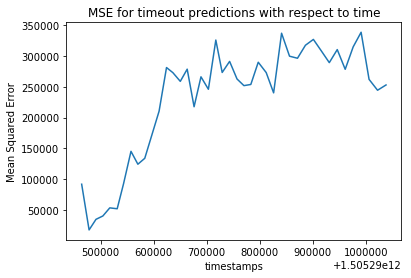

In [99]:
test_evaluations = pd.read_csv("../data/stats/testresults.csv")
time = test_evaluations["timestamp"].values
mse = test_evaluations["meanSquaredError"].values
plt.plot(time, mse)
plt.ylabel('Mean Squared Error')
plt.xlabel('timestamps')
plt.title('MSE for timeout predictions with respect to time')
plt.show()

## Inspection of Data collected for a single node

The RTT distribution should follow a gaussian distribution with occasional message-losses

### RTT graph

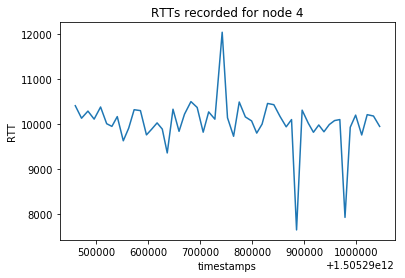

In [100]:
rtt_data = pd.read_csv('../data/stats/rtt_data.csv')
node4 = rtt_data.loc[rtt_data['node'] == 4]
time = node4["timestamp"].values
prediction = node4["rtt"].values
plt.plot(time, prediction)
plt.ylabel('RTT')
plt.xlabel('timestamps')
plt.title('RTTs recorded for node 4')
plt.show()

### RTT Distribution

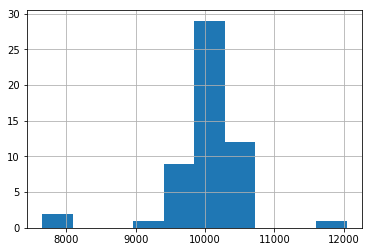

In [101]:
node4 = rtt_data.loc[rtt_data['node'] == 4]
node4["rtt"].hist()

### Node predictions

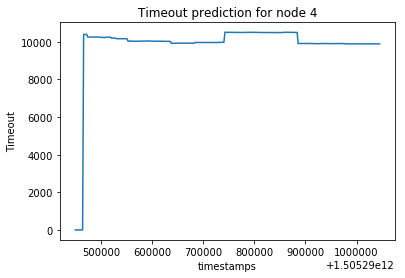

In [102]:
prediction_data = pd.read_csv('../data/stats/prediction_data.csv')
node4 = prediction_data.loc[prediction_data['node'] == 4]
time = node4["timestamp"].values
prediction = node4["prediction"].values
plt.plot(time, prediction)
plt.ylabel('Timeout')
plt.xlabel('timestamps')
plt.title('Timeout prediction for node 4')
plt.show()

## RTT Distributions related to geographic location

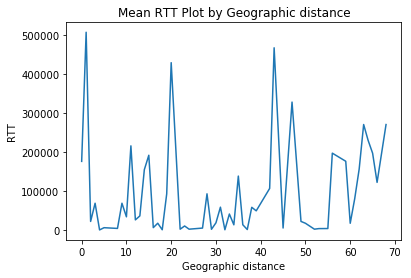

In [103]:
rtt_data_with_mean = rtt_data.groupby(['geo', 'rtt'], as_index=False).mean().groupby('geo')['rtt'].mean()
rtt_data_with_std = rtt_data.groupby('geo')[['rtt']].std()
plt.plot(rtt_data_with_mean)
plt.ylabel('RTT')
plt.xlabel('Geographic distance')
plt.title('Mean RTT Plot by Geographic distance')
plt.show()

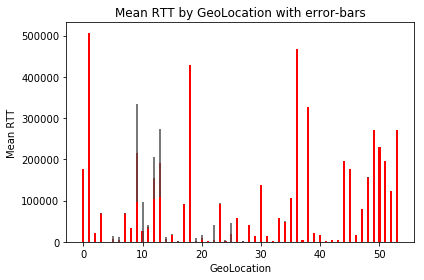

In [104]:
rtt = rtt_data_with_mean.values
std = rtt_data_with_std.values
l = len(rtt)
width = 0.35
error_config = {'ecolor': '0.3'}
plt.bar(range(len(rtt)), rtt, width=width, color='r', yerr=std, error_kw=error_config)
plt.xlabel('GeoLocation')
plt.ylabel('Mean RTT')
plt.title('Mean RTT by GeoLocation with error-bars')
plt.tight_layout()

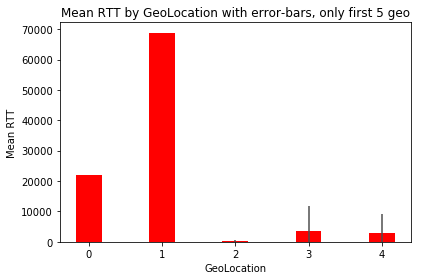

In [84]:
rtt = rtt_data_with_mean.head().values
std = rtt_data_with_std.head().values
l = len(rtt)
width = 0.35
error_config = {'ecolor': '0.3'}
plt.bar(range(len(rtt)), rtt, width=width, color='r', yerr=std, error_kw=error_config)
plt.xlabel('GeoLocation')
plt.ylabel('Mean RTT')
plt.title('Mean RTT by GeoLocation with error-bars, only first 5 geo')
plt.tight_layout()

## RTT Distributions related to bandwidth score

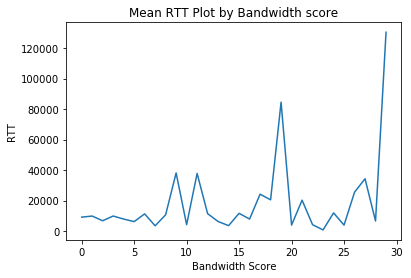

In [74]:
rtt_data_with_mean = rtt_data.groupby(['bandwidth', 'rtt'], as_index=False).mean().groupby('bandwidth')['rtt'].mean()
rtt_data_with_std = rtt_data.groupby('bandwidth')[['rtt']].std()
plt.plot(rtt_data_with_mean)
plt.ylabel('RTT')
plt.xlabel('Bandwidth Score')
plt.title('Mean RTT Plot by Bandwidth score')
plt.show()

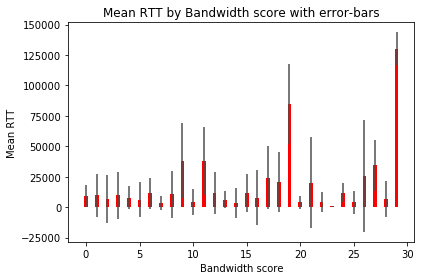

In [75]:
rtt = rtt_data_with_mean.values
std = rtt_data_with_std.values
l = len(rtt)
width = 0.35
error_config = {'ecolor': '0.3'}
plt.bar(range(len(rtt)), rtt, width=width, color='r', yerr=std, error_kw=error_config)
plt.xlabel('Bandwidth score')
plt.ylabel('Mean RTT')
plt.title('Mean RTT by Bandwidth score with error-bars')
plt.tight_layout()

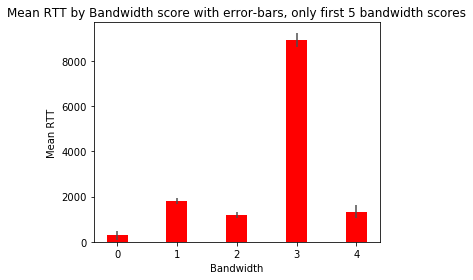

In [63]:
rtt = rtt_data_with_mean.head().values
std = rtt_data_with_std.head().values
l = len(rtt)
width = 0.35
error_config = {'ecolor': '0.3'}
plt.bar(range(len(rtt)), rtt, width=width, color='r', yerr=std, error_kw=error_config)
plt.xlabel('Bandwidth')
plt.ylabel('Mean RTT')
plt.title('Mean RTT by Bandwidth score with error-bars, only first 5 bandwidth scores')
plt.tight_layout()

## Distribution of standard deviations

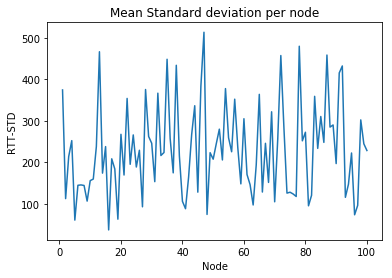

In [64]:
rtt_data_with_mean = rtt_data.groupby(['node', 'rttStd'], as_index=False).mean().groupby('node')['rttStd'].mean()
rtt_data_with_std = rtt_data.groupby('node')[['rttStd']].std()
plt.plot(rtt_data_with_mean)
plt.ylabel('RTT-STD')
plt.xlabel('Node')
plt.title('Mean Standard deviation per node')
plt.show()

## Analysis of number of suspected/crashed nodes with respect to time

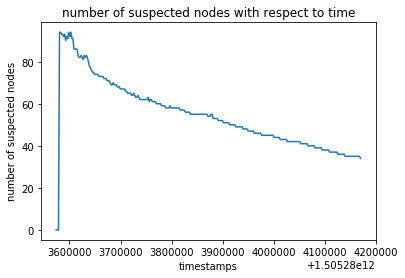

In [45]:
nodes_data = pd.read_csv('../data/stats/suspected_nodes.csv')
time = nodes_data["timestamp"].values
nodes = nodes_data["numberOfSuspectedNodes"].values
plt.plot(time, nodes)
plt.ylabel('number of suspected nodes')
plt.xlabel('timestamps')
plt.title('number of suspected nodes with respect to time')
plt.show()

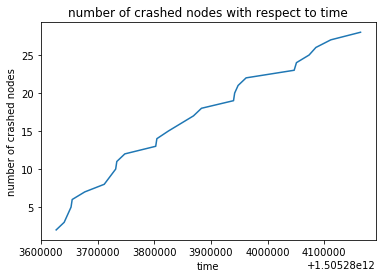

In [46]:
nodes_data = pd.read_csv('../data/stats/crashed_nodes.csv')
time = nodes_data["timestamp"].values
nodes = nodes_data["numberOfCrashedNodes"].values
plt.plot(time, nodes)
plt.ylabel('number of crashed nodes')
plt.xlabel('time')
plt.title('number of crashed nodes with respect to time')
plt.show()

## False suspicions with respect to time

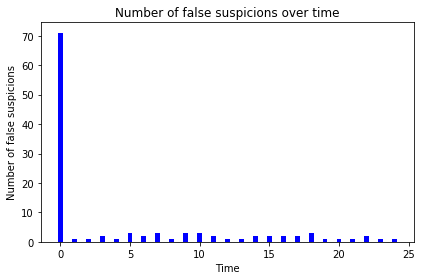

In [47]:
false_suspicions = pd.read_csv('../data/stats/node_false_suspicions.csv').groupby("timestamp").count()
l = len(false_suspicions.values)
width = 0.35
error_config = {'ecolor': '0.3'}
plt.bar(range(len(false_suspicions.values)), false_suspicions.values, width=width, color='b', error_kw=error_config)
plt.xlabel('Time')
plt.ylabel('Number of false suspicions')
plt.title('Number of false suspicions over time')
plt.tight_layout()

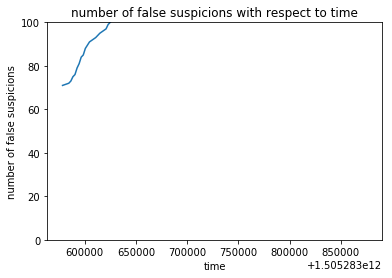

In [48]:
nodes_data = pd.read_csv('../data/stats/false_suspicion_count.csv')
time = nodes_data["timestamp"].values
nodes = nodes_data["numberOfFalseSuspicions"].values
plt.plot(time, nodes)
plt.ylim(0,100)
#plt.axis([3000, 80000, 0, 100])
plt.ylabel('number of false suspicions')
plt.xlabel('time')
plt.title('number of false suspicions with respect to time')
plt.show()

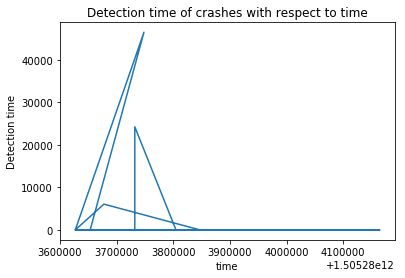

In [49]:
nodes_data = pd.read_csv('../data/stats/node_detection_times.csv').drop("node", 1)
time = nodes_data["crashTimestamp"].values
nodes = nodes_data["detectionTime"].values
plt.plot(time, nodes)
plt.ylabel('Detection time')
plt.xlabel('time')
plt.title('Detection time of crashes with respect to time')
plt.show()

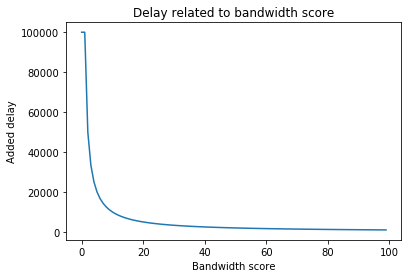

In [50]:
nodes_data = pd.read_csv('../data/stats/bandwidth_delay.csv')
bandwidth = nodes_data["bandwidth"].values
delay = nodes_data["delay"].values
plt.plot(bandwidth, delay)
plt.ylabel('Added delay')
plt.xlabel('Bandwidth score')
plt.title('Delay related to bandwidth score')
plt.show()

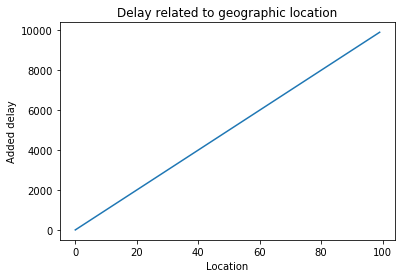

In [51]:
nodes_data = pd.read_csv('../data/stats/geo_delay.csv')
geo = nodes_data["location"].values
delay = nodes_data["delay"].values
plt.plot(bandwidth, delay)
plt.ylabel('Added delay')
plt.xlabel('Location')
plt.title('Delay related to geographic location')
plt.show()